<a href="https://colab.research.google.com/github/mmsamiei/lets-pytorch/blob/master/Q7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 16384/9912422 [00:00<01:29, 111140.99it/s]

9920512it [00:00, 28944872.22it/s]                           


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 448833.02it/s]
  1%|          | 16384/1648877 [00:00<00:11, 147274.54it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 6602481.45it/s]                           
8192it [00:00, 191669.02it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = (original_train_dataset.data.float() / 255)
test_tensors = (original_test_dataset.data.float() / 255)

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, stride = 2)
        self.conv1_bn = nn.BatchNorm2d(4)
        self.conv2 = nn.Conv2d(4, 8, 3, stride = 2)
        self.conv2_bn = nn.BatchNorm2d(8)
        self.conv3 = nn.Conv2d(8, 16, 3, stride = 2)
        self.conv3_bn = nn.BatchNorm2d(16)
        self.lrelu = nn.LeakyReLU(0.2)
        self.lin = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        temp = x.view(-1, 1, 28, 28)
        temp = self.conv1(temp)
        temp = self.conv1_bn(temp)
        temp = self.lrelu(temp)
        temp = self.conv2(temp)
        temp = self.conv2_bn(temp)
        temp = self.lrelu(temp)
        temp = self.conv3(temp)
        temp = self.conv3_bn(temp)
        temp = self.lrelu(temp)
        temp = temp.view(-1, 64)
        temp = self.lin(temp)
        out = self.sigmoid(temp)
        return out

In [0]:
import torch.nn.functional as F

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.deconv1 = nn.ConvTranspose2d(100, 128, 4)
    self.deconv1_bn = nn.BatchNorm2d(128)
    self.droput1 = nn.Dropout2d(p=0.5)
    self.deconv2 = nn.ConvTranspose2d(128, 64, 4)
    self.deconv2_bn = nn.BatchNorm2d(64)
    self.droput2 = nn.Dropout2d(p=0.5)
    self.deconv3 = nn.ConvTranspose2d(64, 32, 4)
    self.deconv3_bn = nn.BatchNorm2d(32)
    self.deconv4 = nn.ConvTranspose2d(32, 16, 4)
    self.deconv4_bn = nn.BatchNorm2d(16)
    self.deconv5 = nn.ConvTranspose2d(16, 1, 4, stride = 2) 
    self.lrelu = nn.LeakyReLU(0.2)
    
  # x must be 100
  def forward(self, x):
    temp = x.view(-1, 100, 1, 1)
    temp = self.deconv1(temp)
    temp = self.deconv1_bn(temp)
    temp = self.lrelu(temp)
    temp = self.droput1(temp)
    temp = self.deconv2(temp)
    temp = self.deconv2_bn(temp)
    temp = self.lrelu(temp)
    temp = self.droput2(temp)
    temp = self.deconv3(temp)
    temp = self.deconv3_bn(temp)
    temp = self.lrelu(temp)
    temp = self.deconv4(temp)
    temp = self.deconv4_bn(temp)
    temp = self.lrelu(temp)
    temp = self.deconv5(temp)
    temp = F.tanh(temp)
    return temp

In [0]:
discriminator = Discriminator()
generator = Generator()

In [9]:
testi = torch.randn(10, 100)
temp = generator(testi)
temp = discriminator(temp)
temp.shape

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([10, 1])

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 0 	 last batch loss D: 1.4255555868148804 	 last batch loss G: 0.6758684515953064


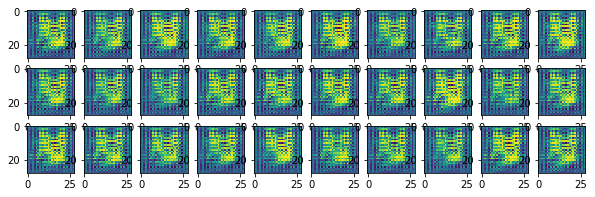

epoch: 1 	 last batch loss D: 1.391079306602478 	 last batch loss G: 0.6637310981750488


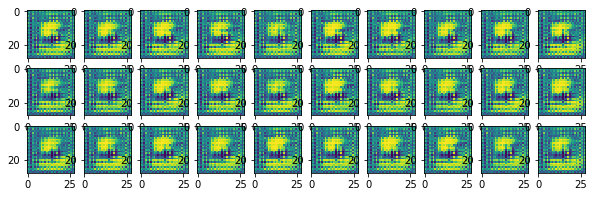

epoch: 2 	 last batch loss D: 1.443460464477539 	 last batch loss G: 0.6361993551254272


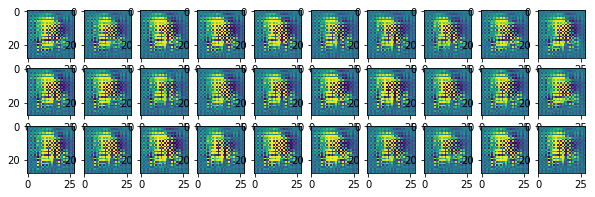

epoch: 3 	 last batch loss D: 1.3578965663909912 	 last batch loss G: 0.7387927770614624


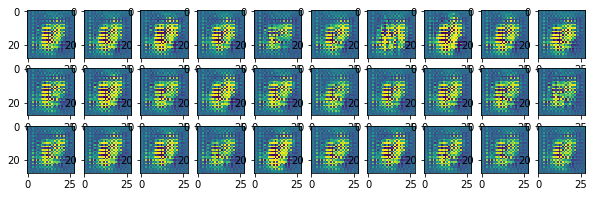

epoch: 4 	 last batch loss D: 1.3909357786178589 	 last batch loss G: 0.664726197719574


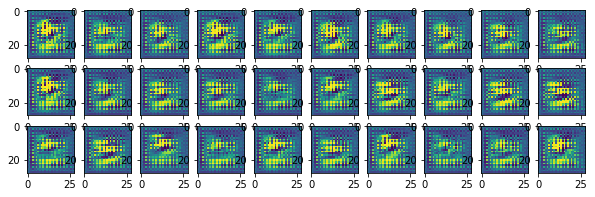

epoch: 5 	 last batch loss D: 1.41761314868927 	 last batch loss G: 0.636640191078186


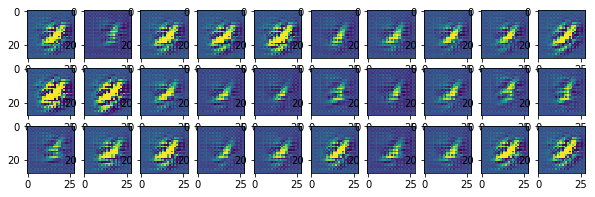

epoch: 6 	 last batch loss D: 1.3710787296295166 	 last batch loss G: 0.6808929443359375


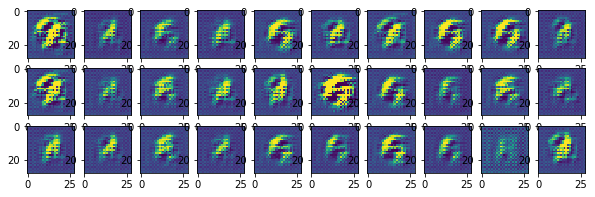

epoch: 7 	 last batch loss D: 1.3317848443984985 	 last batch loss G: 0.7007648944854736


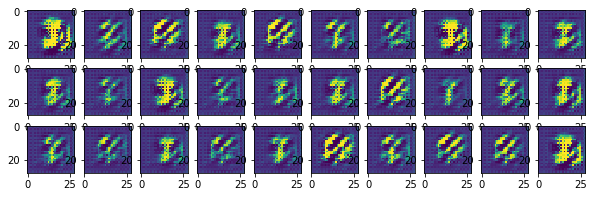

epoch: 8 	 last batch loss D: 1.3009178638458252 	 last batch loss G: 0.804885983467102


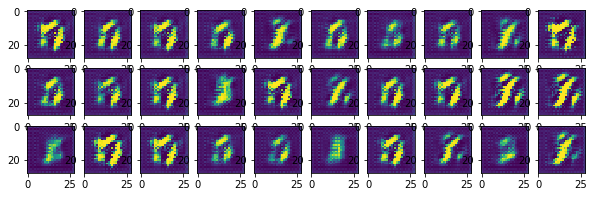

epoch: 9 	 last batch loss D: 1.2578848600387573 	 last batch loss G: 0.8058746457099915


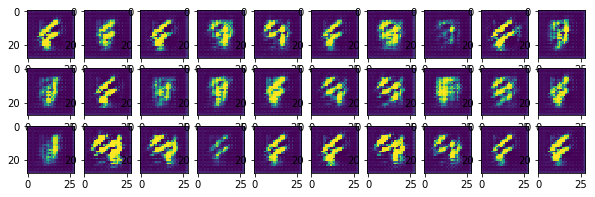

epoch: 10 	 last batch loss D: 1.214611530303955 	 last batch loss G: 0.9260123372077942


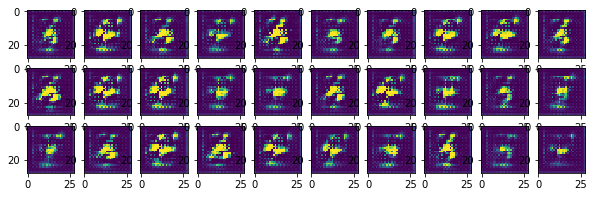

epoch: 11 	 last batch loss D: 1.4005908966064453 	 last batch loss G: 0.8676104545593262


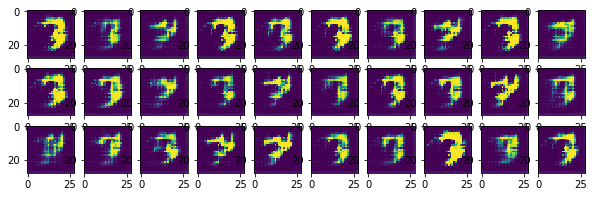

epoch: 12 	 last batch loss D: 1.3837330341339111 	 last batch loss G: 0.813633382320404


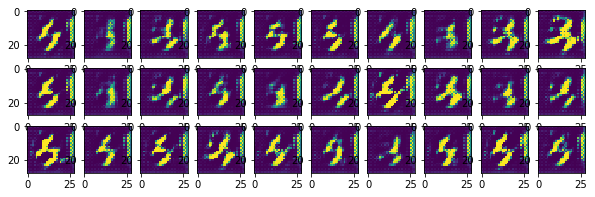

epoch: 13 	 last batch loss D: 1.0617291927337646 	 last batch loss G: 1.0522890090942383


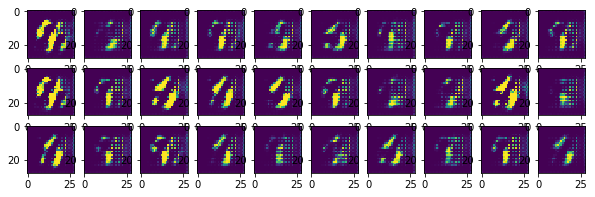

epoch: 14 	 last batch loss D: 0.936320424079895 	 last batch loss G: 1.0323628187179565


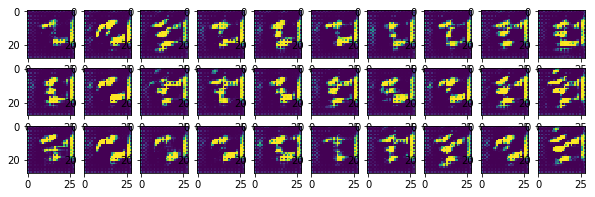

epoch: 15 	 last batch loss D: 1.3003275394439697 	 last batch loss G: 0.9326232671737671


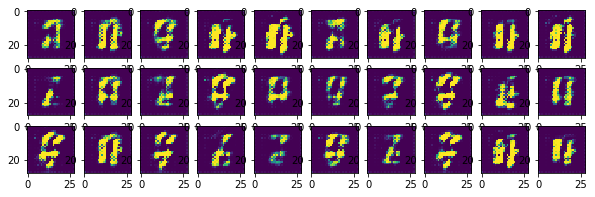

epoch: 16 	 last batch loss D: 1.6717503070831299 	 last batch loss G: 0.6485213041305542


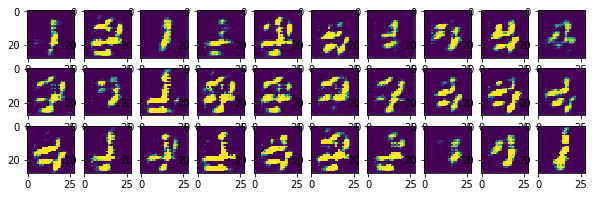

epoch: 17 	 last batch loss D: 1.1164891719818115 	 last batch loss G: 0.9013117551803589


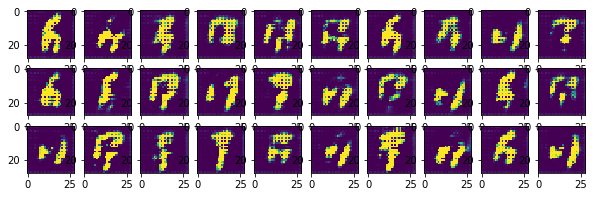

epoch: 18 	 last batch loss D: 1.2162405252456665 	 last batch loss G: 1.0364594459533691


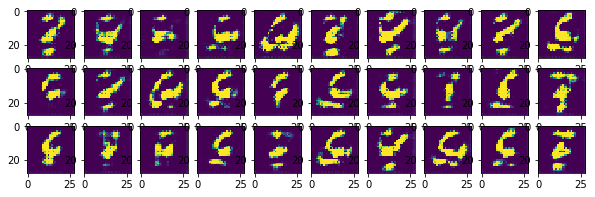

epoch: 19 	 last batch loss D: 1.2706520557403564 	 last batch loss G: 0.9068769216537476


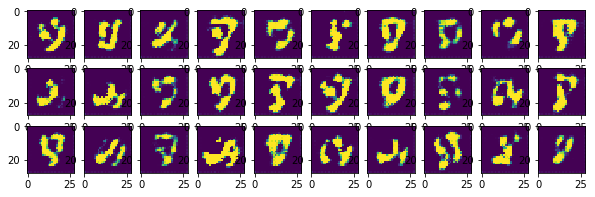

epoch: 20 	 last batch loss D: 0.9769814014434814 	 last batch loss G: 0.7555798292160034


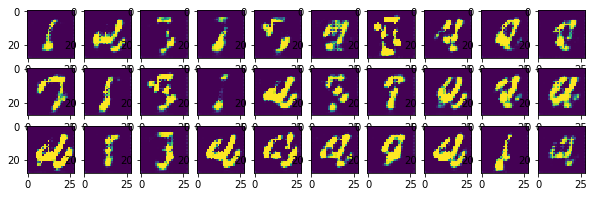

epoch: 21 	 last batch loss D: 1.2112442255020142 	 last batch loss G: 1.039717435836792


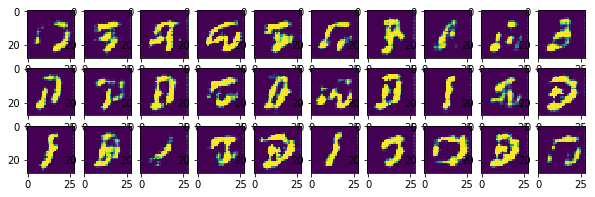

epoch: 22 	 last batch loss D: 1.2193083763122559 	 last batch loss G: 0.8862136602401733


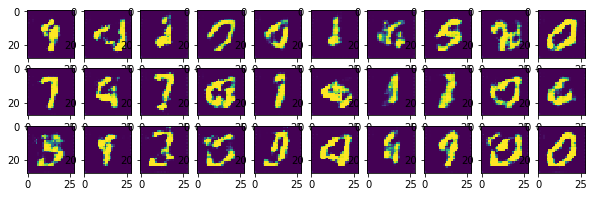

epoch: 23 	 last batch loss D: 0.6346355676651001 	 last batch loss G: 1.847530484199524


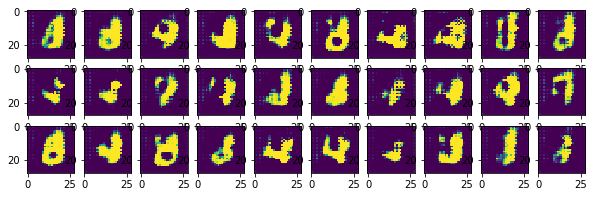

epoch: 24 	 last batch loss D: 1.2999827861785889 	 last batch loss G: 0.9568325281143188


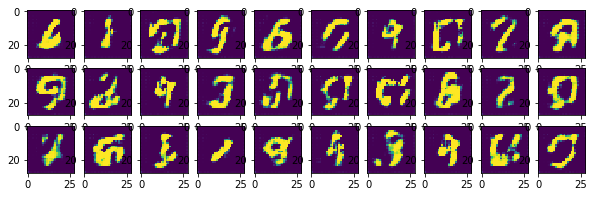

epoch: 25 	 last batch loss D: 1.325969934463501 	 last batch loss G: 1.1165149211883545


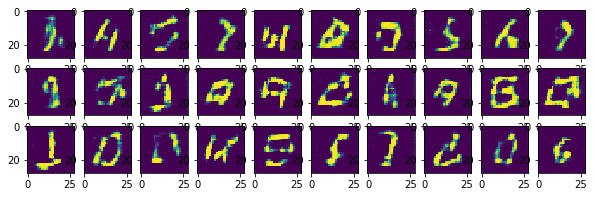

epoch: 26 	 last batch loss D: 1.6391682624816895 	 last batch loss G: 0.6855447292327881


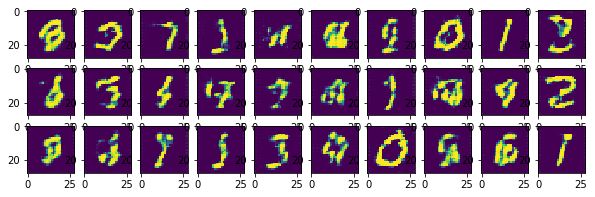

epoch: 27 	 last batch loss D: 1.5008660554885864 	 last batch loss G: 0.6471773386001587


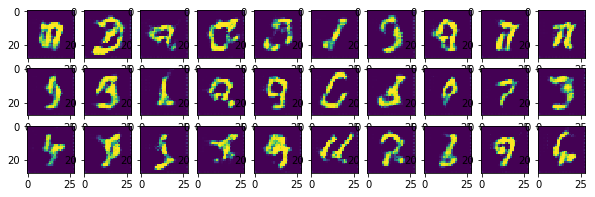

epoch: 28 	 last batch loss D: 1.3356443643569946 	 last batch loss G: 0.8006280660629272


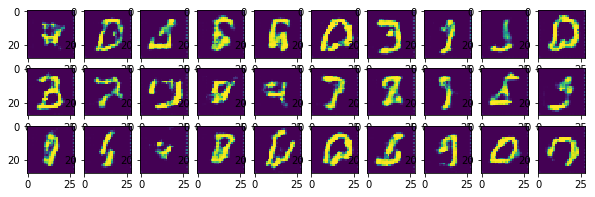

epoch: 29 	 last batch loss D: 1.3828026056289673 	 last batch loss G: 0.6906444430351257


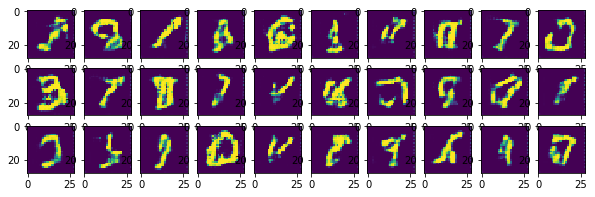

epoch: 30 	 last batch loss D: 1.4283578395843506 	 last batch loss G: 0.6886376142501831


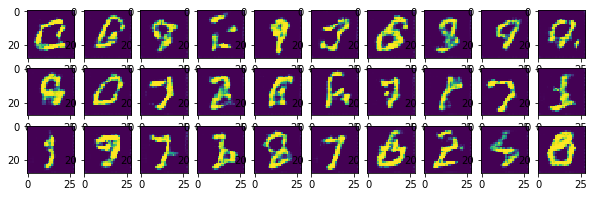

epoch: 31 	 last batch loss D: 1.2083407640457153 	 last batch loss G: 0.9625364542007446


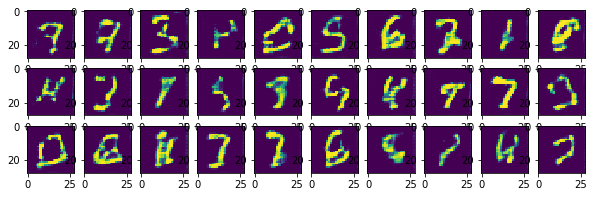

epoch: 32 	 last batch loss D: 1.390627145767212 	 last batch loss G: 0.7349704504013062


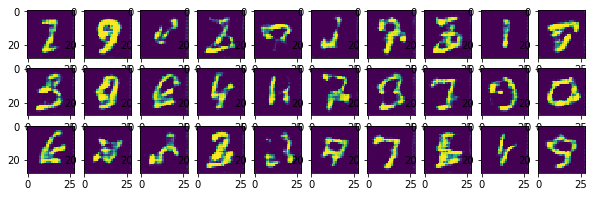

epoch: 33 	 last batch loss D: 1.2992463111877441 	 last batch loss G: 0.7550535798072815


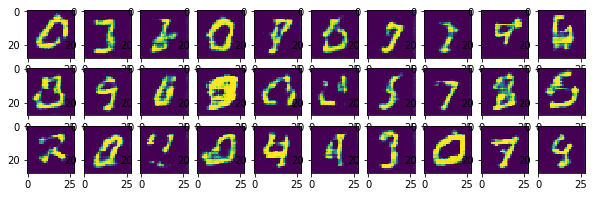

epoch: 34 	 last batch loss D: 1.4784777164459229 	 last batch loss G: 0.6170240640640259


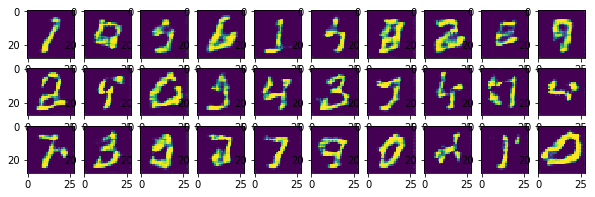

epoch: 35 	 last batch loss D: 1.5575599670410156 	 last batch loss G: 0.7782682776451111


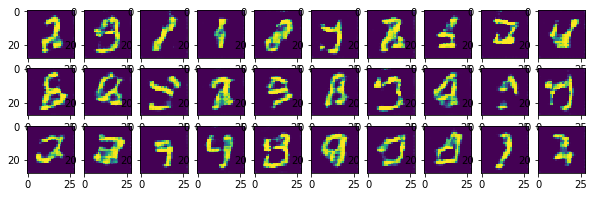

epoch: 36 	 last batch loss D: 1.4171457290649414 	 last batch loss G: 0.6650936007499695


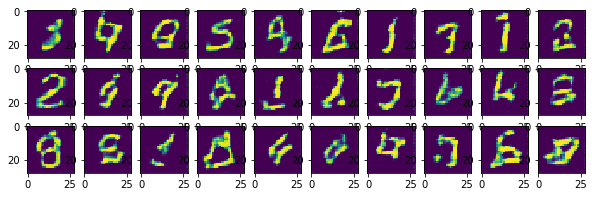

epoch: 37 	 last batch loss D: 1.4838742017745972 	 last batch loss G: 0.816484272480011


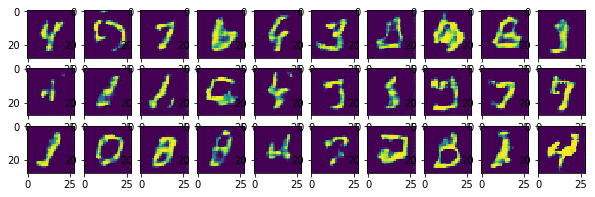

epoch: 38 	 last batch loss D: 1.4780099391937256 	 last batch loss G: 0.7354860305786133


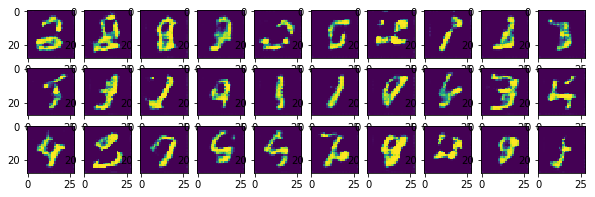

epoch: 39 	 last batch loss D: 1.3271069526672363 	 last batch loss G: 0.9026198387145996


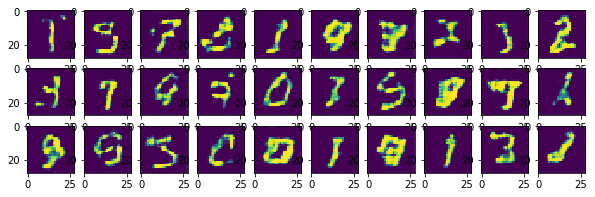

epoch: 40 	 last batch loss D: 1.360889196395874 	 last batch loss G: 0.6791260242462158


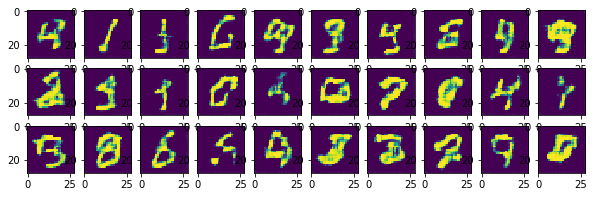

epoch: 41 	 last batch loss D: 1.394348382949829 	 last batch loss G: 0.6876842975616455


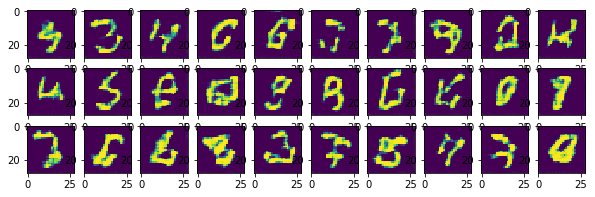

epoch: 42 	 last batch loss D: 1.3584673404693604 	 last batch loss G: 0.6831986904144287


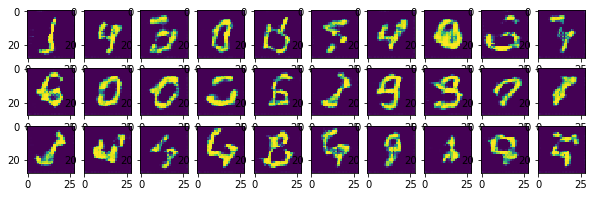

epoch: 43 	 last batch loss D: 1.3202614784240723 	 last batch loss G: 0.689755380153656


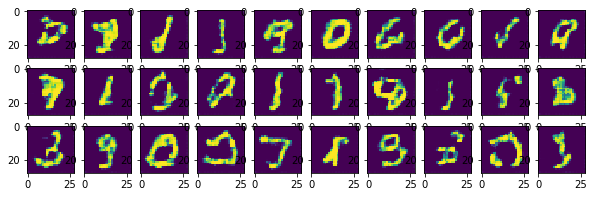

epoch: 44 	 last batch loss D: 1.4532089233398438 	 last batch loss G: 0.6757359504699707


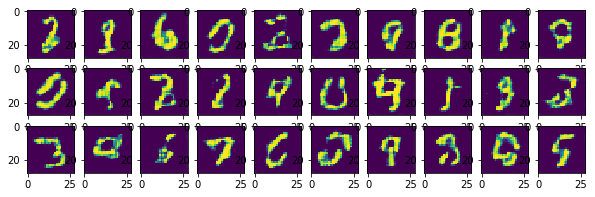

epoch: 45 	 last batch loss D: 1.3268835544586182 	 last batch loss G: 0.7985769510269165


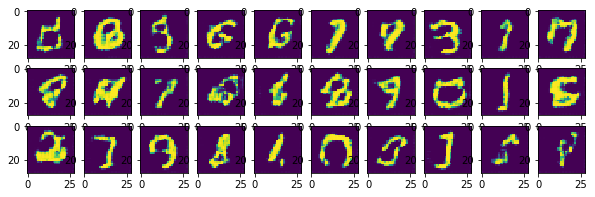

epoch: 46 	 last batch loss D: 1.29063081741333 	 last batch loss G: 0.8316531181335449


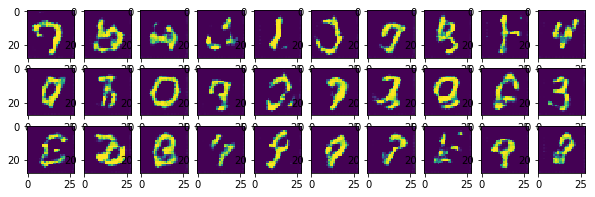

epoch: 47 	 last batch loss D: 1.4433343410491943 	 last batch loss G: 0.8841987252235413


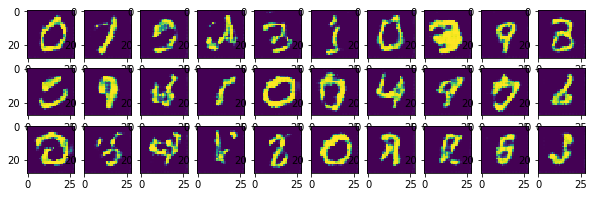

epoch: 48 	 last batch loss D: 1.2872247695922852 	 last batch loss G: 0.8476074934005737


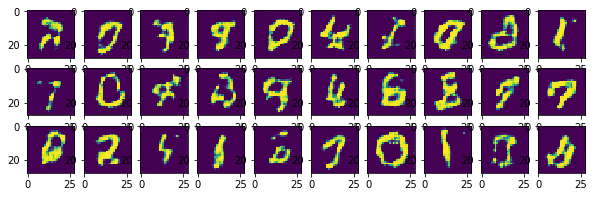

epoch: 49 	 last batch loss D: 1.094306230545044 	 last batch loss G: 0.9579256772994995


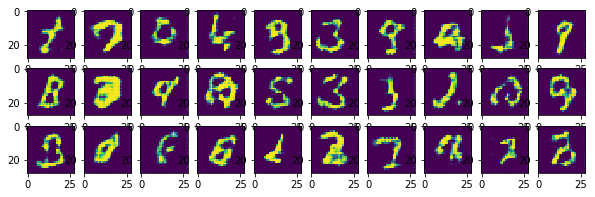

epoch: 50 	 last batch loss D: 1.3501728773117065 	 last batch loss G: 0.7329807281494141


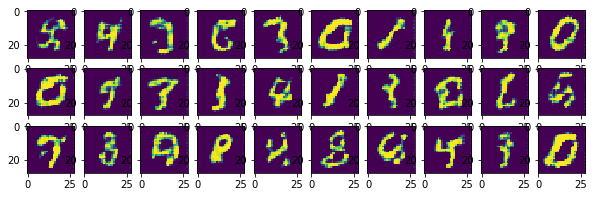

epoch: 51 	 last batch loss D: 1.1859078407287598 	 last batch loss G: 0.9949842095375061


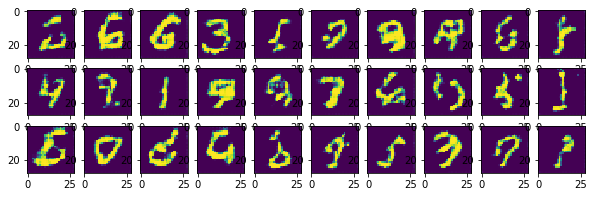

epoch: 52 	 last batch loss D: 1.277209758758545 	 last batch loss G: 0.7429075241088867


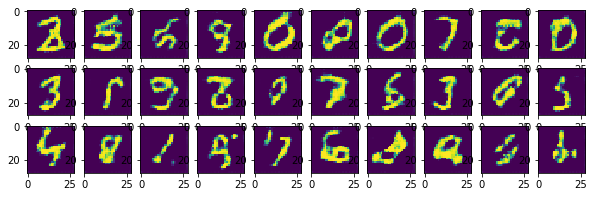

epoch: 53 	 last batch loss D: 1.2014553546905518 	 last batch loss G: 0.8459281921386719


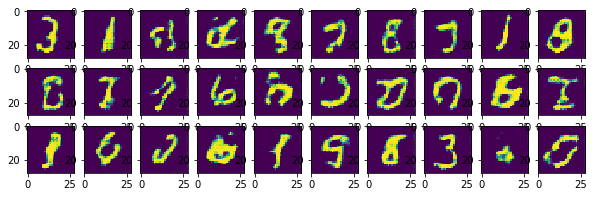

epoch: 54 	 last batch loss D: 1.4718096256256104 	 last batch loss G: 0.7704286575317383


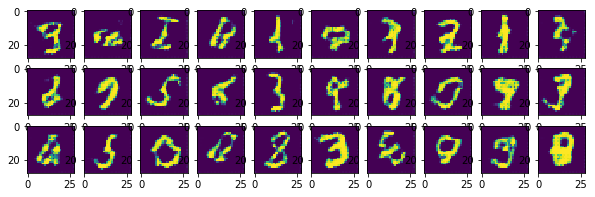

epoch: 55 	 last batch loss D: 1.2149490118026733 	 last batch loss G: 0.9625918865203857


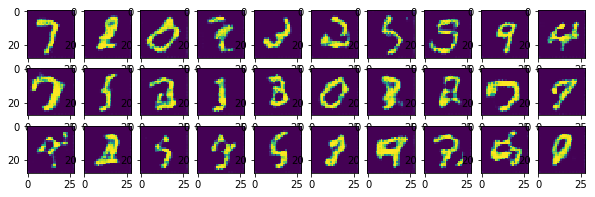

epoch: 56 	 last batch loss D: 1.356412649154663 	 last batch loss G: 0.8595437407493591


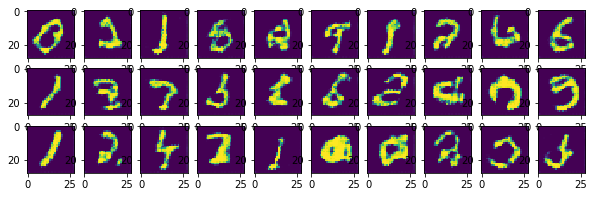

epoch: 57 	 last batch loss D: 1.3205317258834839 	 last batch loss G: 0.8562089800834656


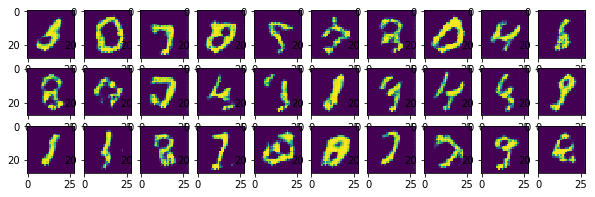

epoch: 58 	 last batch loss D: 1.251022458076477 	 last batch loss G: 0.864253044128418


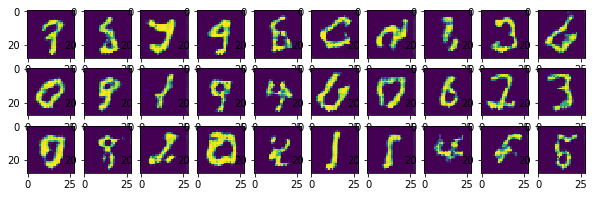

epoch: 59 	 last batch loss D: 1.301168441772461 	 last batch loss G: 0.8360786437988281


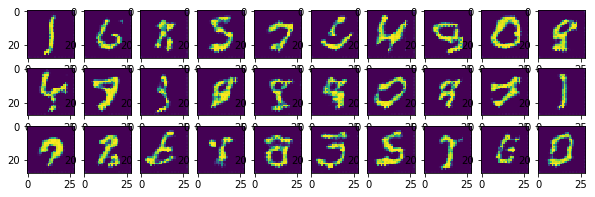

epoch: 60 	 last batch loss D: 1.1290299892425537 	 last batch loss G: 1.1985152959823608


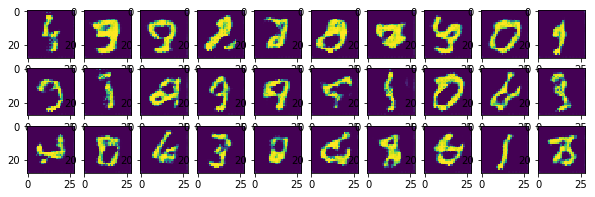

epoch: 61 	 last batch loss D: 1.312760353088379 	 last batch loss G: 1.201056718826294


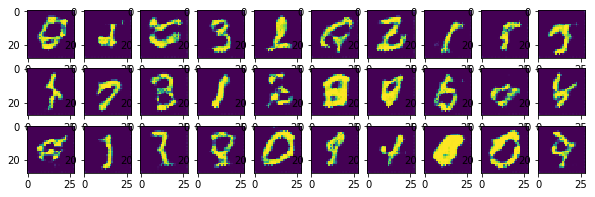

epoch: 62 	 last batch loss D: 1.3213768005371094 	 last batch loss G: 0.7266169786453247


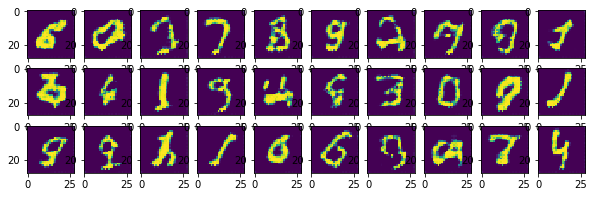

epoch: 63 	 last batch loss D: 1.4277527332305908 	 last batch loss G: 0.9826768636703491


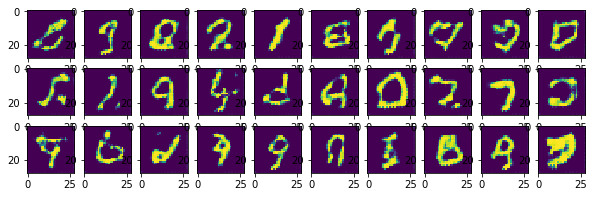

epoch: 64 	 last batch loss D: 1.4066495895385742 	 last batch loss G: 0.8647392392158508


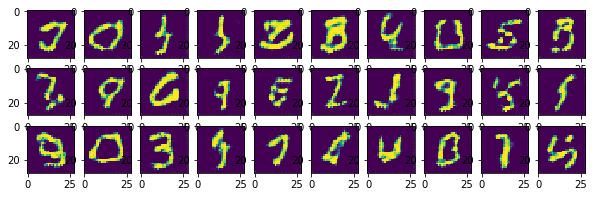

epoch: 65 	 last batch loss D: 1.3713077306747437 	 last batch loss G: 0.8199586868286133


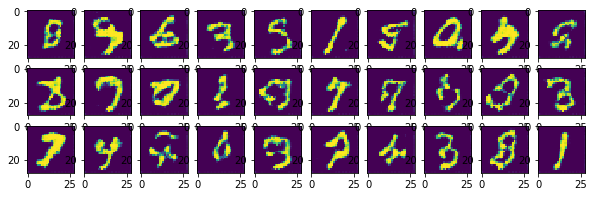

epoch: 66 	 last batch loss D: 1.244124174118042 	 last batch loss G: 0.7100580930709839


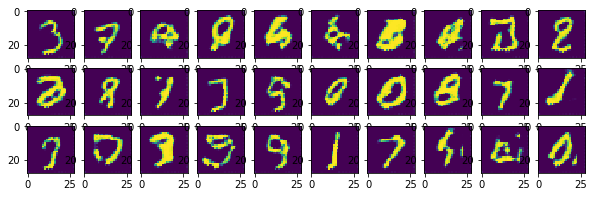

epoch: 67 	 last batch loss D: 1.352705478668213 	 last batch loss G: 0.6927928924560547


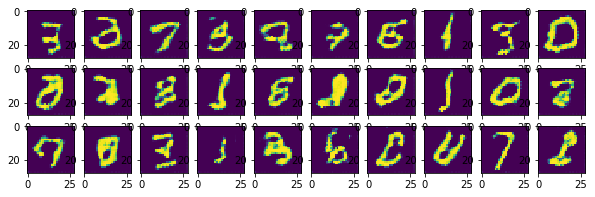

epoch: 68 	 last batch loss D: 1.3044400215148926 	 last batch loss G: 0.8719688653945923


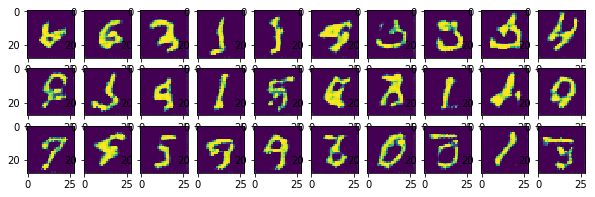

epoch: 69 	 last batch loss D: 1.1139111518859863 	 last batch loss G: 0.7122973203659058


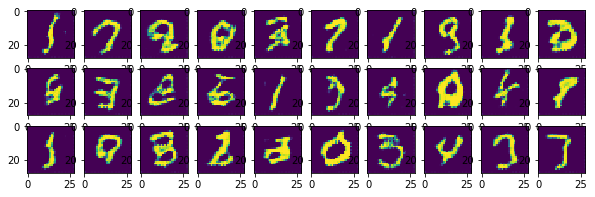

epoch: 70 	 last batch loss D: 1.0633543729782104 	 last batch loss G: 0.7933036088943481


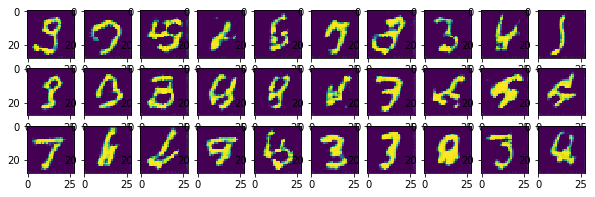

epoch: 71 	 last batch loss D: 1.3061518669128418 	 last batch loss G: 0.9090179204940796


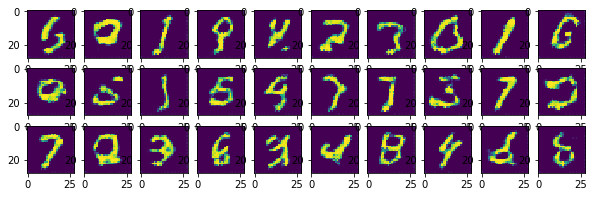

epoch: 72 	 last batch loss D: 1.2278342247009277 	 last batch loss G: 0.9254870414733887


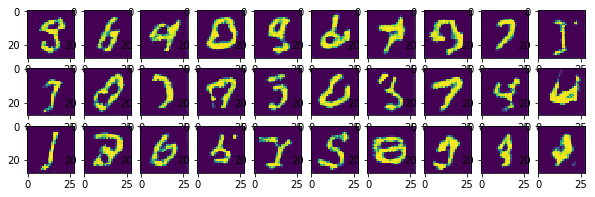

epoch: 73 	 last batch loss D: 1.2835075855255127 	 last batch loss G: 0.9250699281692505


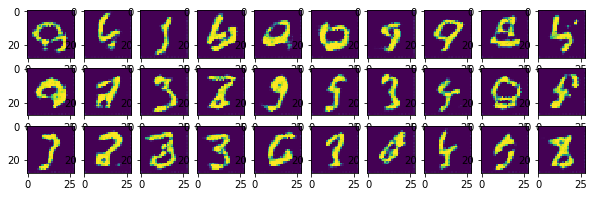

epoch: 74 	 last batch loss D: 1.205240249633789 	 last batch loss G: 1.024182677268982


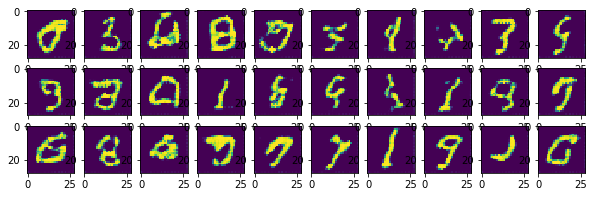

epoch: 75 	 last batch loss D: 1.2357873916625977 	 last batch loss G: 1.0391840934753418


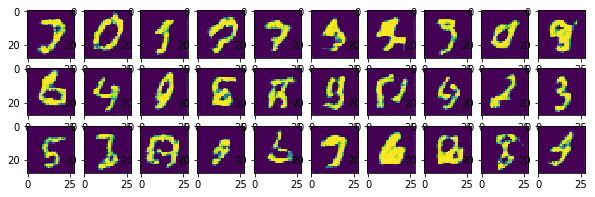

epoch: 76 	 last batch loss D: 1.0858741998672485 	 last batch loss G: 0.9787847399711609


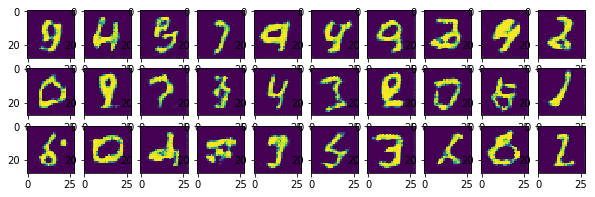

epoch: 77 	 last batch loss D: 1.247248649597168 	 last batch loss G: 0.7887510657310486


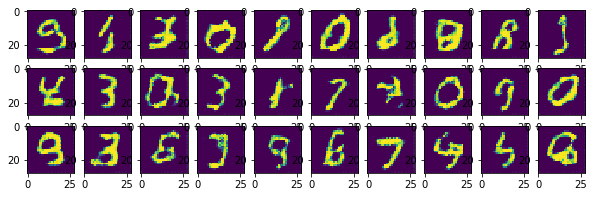

epoch: 78 	 last batch loss D: 1.3140722513198853 	 last batch loss G: 0.6991299390792847


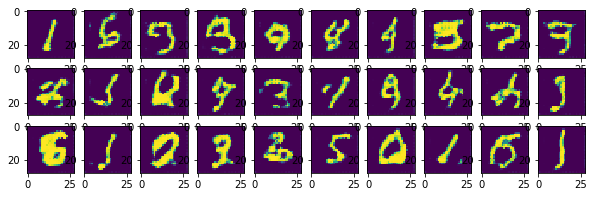

epoch: 79 	 last batch loss D: 1.3822088241577148 	 last batch loss G: 0.9107725620269775


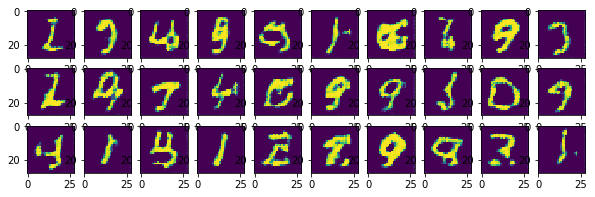

epoch: 80 	 last batch loss D: 1.4700720310211182 	 last batch loss G: 0.632149338722229


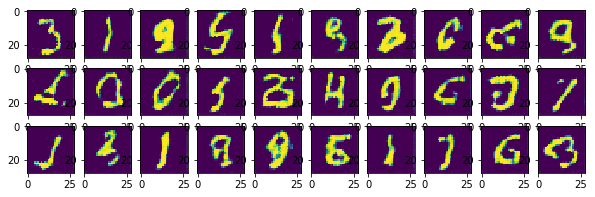

epoch: 81 	 last batch loss D: 1.2337079048156738 	 last batch loss G: 0.8899250626564026


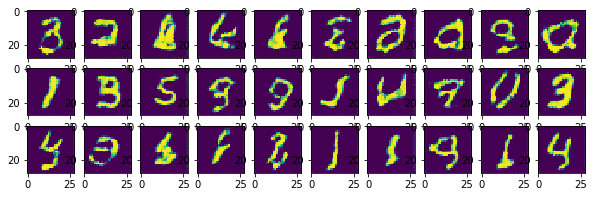

epoch: 82 	 last batch loss D: 1.072937250137329 	 last batch loss G: 0.7051194906234741


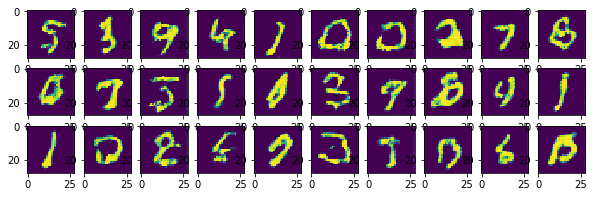

epoch: 83 	 last batch loss D: 1.1301283836364746 	 last batch loss G: 1.0276674032211304


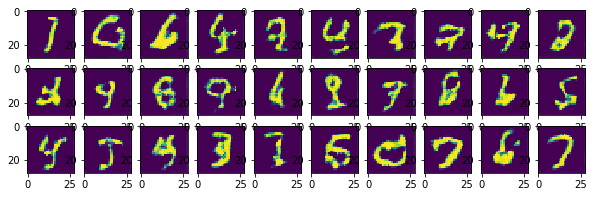

epoch: 84 	 last batch loss D: 1.288416862487793 	 last batch loss G: 0.8801100850105286


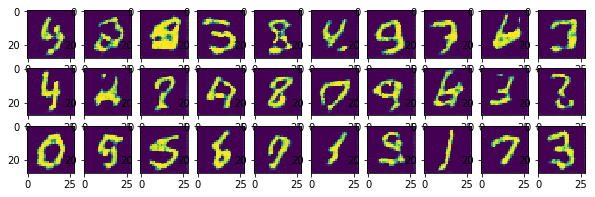

epoch: 85 	 last batch loss D: 1.543243408203125 	 last batch loss G: 1.0897386074066162


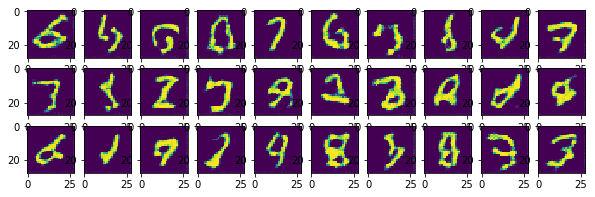

epoch: 86 	 last batch loss D: 1.3005290031433105 	 last batch loss G: 0.6974040269851685


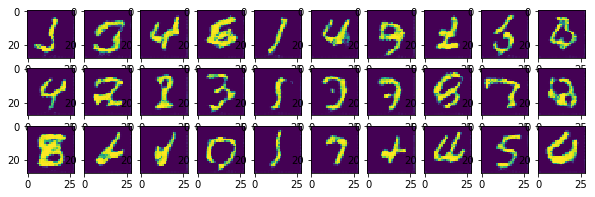

epoch: 87 	 last batch loss D: 1.2826406955718994 	 last batch loss G: 0.7365927696228027


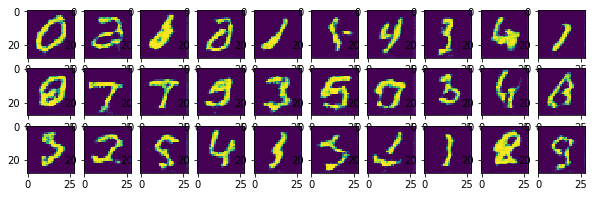

epoch: 88 	 last batch loss D: 1.4226936101913452 	 last batch loss G: 0.681950032711029


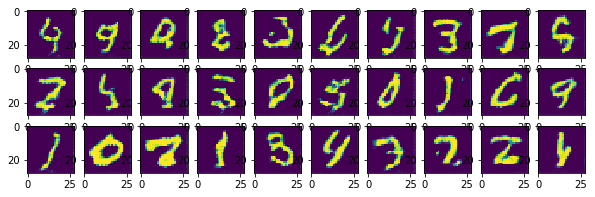

epoch: 89 	 last batch loss D: 1.4187562465667725 	 last batch loss G: 0.7360683679580688


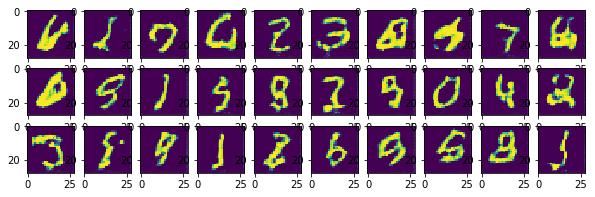

epoch: 90 	 last batch loss D: 1.0494805574417114 	 last batch loss G: 0.8640625476837158


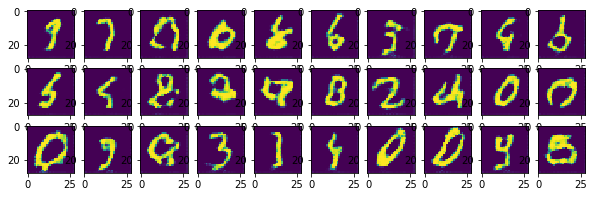

epoch: 91 	 last batch loss D: 1.2341316938400269 	 last batch loss G: 0.8730403184890747


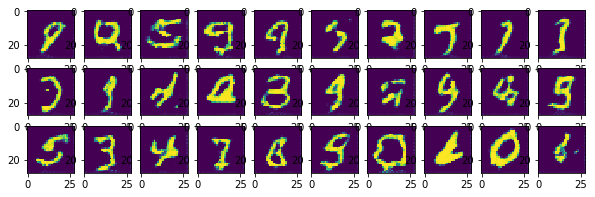

epoch: 92 	 last batch loss D: 1.0956469774246216 	 last batch loss G: 0.9172757863998413


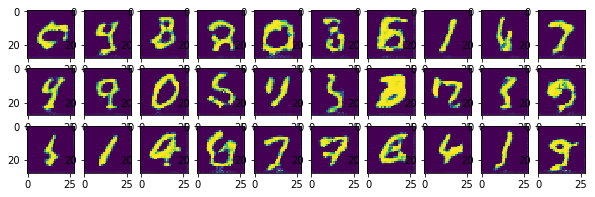

epoch: 93 	 last batch loss D: 1.127105474472046 	 last batch loss G: 0.8602362871170044


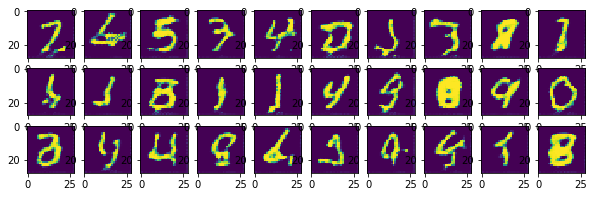

epoch: 94 	 last batch loss D: 1.2841308116912842 	 last batch loss G: 0.867882490158081


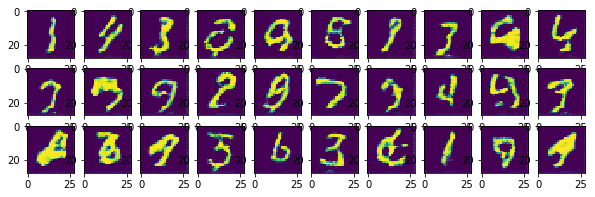

epoch: 95 	 last batch loss D: 1.581073522567749 	 last batch loss G: 0.9296058416366577


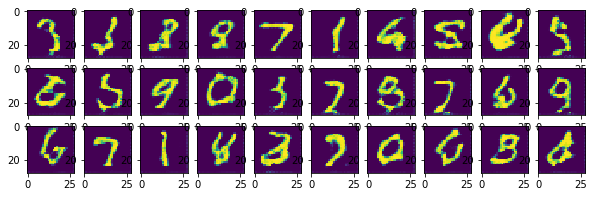

epoch: 96 	 last batch loss D: 1.308294653892517 	 last batch loss G: 0.7599242925643921


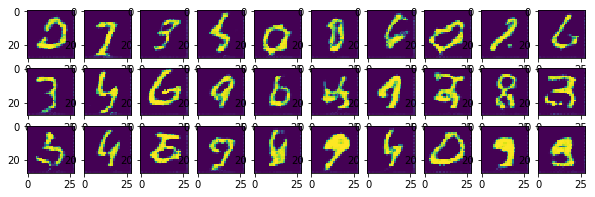

epoch: 97 	 last batch loss D: 1.2866026163101196 	 last batch loss G: 0.775794506072998


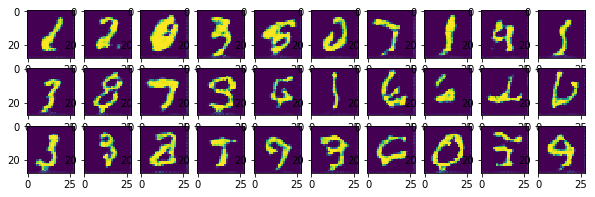

epoch: 98 	 last batch loss D: 1.1457598209381104 	 last batch loss G: 0.8579509258270264


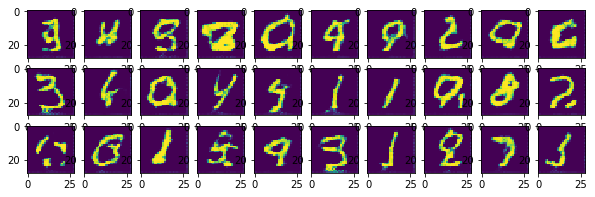

epoch: 99 	 last batch loss D: 1.2630271911621094 	 last batch loss G: 0.7747634649276733


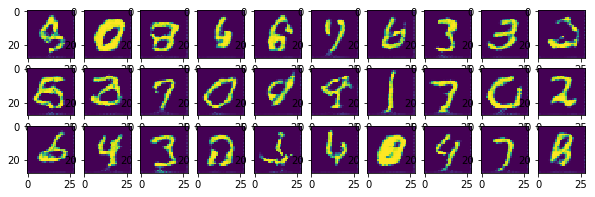

In [14]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

d_losses = []
g_losses = []

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        z = torch.randn(img.shape[0], 100)

        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        
        z = torch.randn(img.shape[0], 100)
        
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    d_losses.append(loss_d.item())
    g_losses.append(loss_g.item())
    
    if epoch%1 == 0:
      print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

      # [CHANGED] Better output
      for i in range(3):
          for j in range(10):
              plt.subplot(3, 10, i * 10 + j + 1)
              plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
      plt.show()


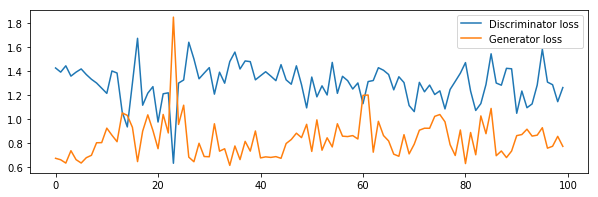

In [15]:
import matplotlib.pyplot as plt

plt.plot(d_losses, label='Discriminator loss')
plt.plot(g_losses, label='Generator loss')
plt.legend()
plt.show()